# 박스플롯 그래프 활용

![](https://www.simplypsychology.org/boxplot.jpg?ezimgfmt=rs:555x285/rscb24/ng:webp/ngcb24)

- 최소값, 1분위값, 중간값, 3분위값, 최대값을 제공함
- 이상치는 lower whisker 보다 작은 데이터 또는 upper whisker 보다 큰 데이터로 화면에 원으로 표시되어 있음

In [55]:
# 라이브러리 사용
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [56]:
import pandas as pd

##########데이터 로드

df = pd.DataFrame([
    [2, 1, 3],
    [3, 2, 5],
    [3, 4, 7],
    [5, 5, 10],
    [7, 5, 12],
    [2, 5, 7],
    [8, 9, 13],
    [9, 10, 13],
    [90, 100, 12], #이상값 추가
    [91, 101, 13], #이상값 추가
    [6, 12, 12]
], columns=['hour', 'attendance', 'score'])

In [57]:
data = [df.hour, df.attendance, df.score]

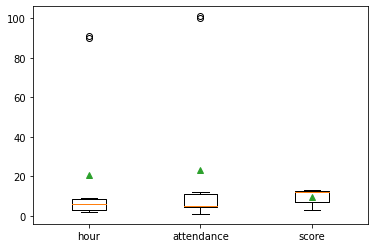

In [58]:
# 데이터 시각화 (박스플롯 세로 출력) 하기
plt.boxplot(data, labels = ['hour', 'attendance', 'score'], showmeans=True)
plt.show()

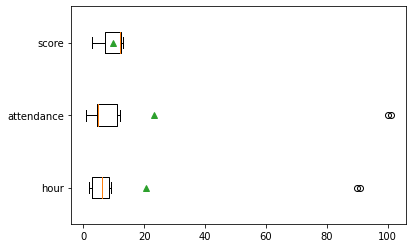

In [59]:
# 데이터 시각화 (박스플롯 가로 출력) 하기
plt.boxplot(data, labels = ['hour', 'attendance', 'score'], showmeans=True, vert = False)
plt.show()

In [60]:
# 이상치 데이터 확인하기
quartile_1 = df.quantile(0.25)
quartile_3 = df.quantile(0.75)
IQR = quartile_3 - quartile_1
condition = (df < (quartile_1 - 1.5 * IQR)) | (df > (quartile_3 + 1.5 * IQR))
condition = condition.any(axis=1)
search_df = df[condition]
print(search_df)

   hour  attendance  score
8    90         100     12
9    91         101     13


In [61]:
# 이상치 데이터 제거
df2 = df.copy()
df2 = df2.drop(search_df.index, axis=0)
print(df2)

    hour  attendance  score
0      2           1      3
1      3           2      5
2      3           4      7
3      5           5     10
4      7           5     12
5      2           5      7
6      8           9     13
7      9          10     13
10     6          12     12


In [63]:
data2 = [df2.hour, df2.attendance, df2.score]

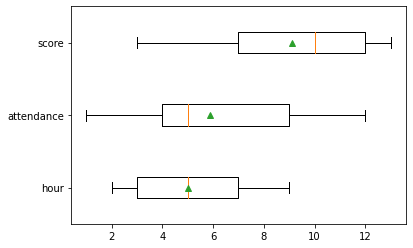

In [64]:
# 제거된 이상치 데이터 확인하기
# 데이터 시각화 (박스플롯 가로 출력) 하기
plt.boxplot(data2, labels = ['hour', 'attendance', 'score'], showmeans=True, vert = False)
plt.show()